<a href="https://colab.research.google.com/github/SrinidhiJai/cafe-sales-data-cleaning-eda/blob/main/Cafe_Sales_Project_Srinidhi_Jeyakumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning & Exploratory Data Analysis (EDA) of Café Sales Data

Hi! This notebook documents my end-to-end data project using a real-world messy dataset of café sales. I found this dataset on Kaggle and used it to practice data cleaning, exploratory analysis, and overall data storytelling using Python in Google Colab.

---

## Project Overview

This notebook is split into two main parts:

1. **Data Cleaning** – identifying and handling missing or invalid values, fixing data types, and creating useful features
2. **Exploratory Data Analysis (EDA)** – using visualizations to understand trends in customer behavior, sales patterns, and payment preferences

The goal is to treat this like a real-world data project that could be presented on GitHub or Kaggle, and eventually serve as part of my data portfolio.


## **Part 1: Data Cleaning**

In this first section, I focused on cleaning and preparing the dataset for analysis. This included:

- Handling missing values
- Fixing data types
- Replacing invalid strings like "ERROR" or "UNKNOWN"
- Creating new columns from the date field for later trend analysis

By the end of this phase, I had a cleaned and structured dataset ready for exploratory analysis.


### Load and Preview the Dataset

I started by loading the `cafe_sales.csv` file.

This dataset contains raw transaction data from a café, including dates, customer names, payment methods, and purchase totals. Our goal in this project is to clean the dataset and prepare it for further analysis or modeling.


In [2]:
import pandas as pd

df = pd.read_csv('cafe_sales_dirty.csv')

# Preview the data
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [4]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


### Converting and Cleaning Numeric Columns

Some numeric columns were stored as object types due to invalid values like `"ERROR"`.

I converted the following columns to numeric using `pd.to_numeric(..., errors='coerce')`, which replaced invalid entries with `NaN`:
- Quantity
- Price Per Unit
- Total Spent

I then imputed missing values using the **median** to maintain a stable distribution.


In [5]:
# Convert to numeric and turn errors into NaN
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [6]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,479
Price Per Unit,533
Total Spent,502
Payment Method,2579
Location,3265
Transaction Date,159


In [7]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())

### Handling Categorical Columns

I cleaned and imputed missing values in the following categorical columns:

- **Item**: Filled using the mode (most common item).
- **Payment Method**: Filled using the mode.
- **Location**: Filled with `"Unknown"` since it's a contextual placeholder.

Before filling, I also replaced invalid entries like `"ERROR"` and `"UNKNOWN"` with `NaN` for proper handling.


In [8]:
df.replace(['ERROR', 'UNKNOWN'], pd.NA, inplace=True)

In [9]:
df['Item'] = df['Item'].fillna(df['Item'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
df['Location'] = df['Location'].fillna('Unknown')

In [10]:
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,460


### Cleaning the `Transaction Date` Column

The `Transaction Date` was initially stored as an object type. Therefore, I:

1. Converted it into a proper `datetime` format using `pd.to_datetime()`, coercing errors into `NaT`.
2. Handled missing dates by filling with the median date.
3. Created new time-based features:
   - Day of Week
   - Month
   - Year

These will support trend analysis and future modeling tasks.


In [11]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [12]:
df['Transaction Date'].isnull().sum()

np.int64(460)

In [13]:
median_date = df['Transaction Date'].median()
df['Transaction Date'] = df['Transaction Date'].fillna(median_date)

In [14]:
df['Transaction Date'].isnull().sum()

np.int64(0)

In [16]:
# Create useful date features
df['Day of Week'] = df['Transaction Date'].dt.day_name()
df['Month'] = df['Transaction Date'].dt.month
df['Year'] = df['Transaction Date'].dt.year

### Final Sanity Checks and Save

Before moving into Exploratory Data Analysis (EDA), I:

- Removed duplicate rows (if any)
- Re-checked that there are no missing values
- Verified data types
- Saved the cleaned dataset as `cafe_sales_cleaned.csv` for future use


In [17]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [18]:
# Sanity Check
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
 8   Day of Week       10000 non-null  object        
 9   Month             10000 non-null  int32         
 10  Year              10000 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 781.4+ KB


,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0
Day of Week,0
Month,0


In [20]:
# Save to Google Drive
df.to_csv('/content/drive/MyDrive/Colab Notebooks/DATA PROJECT/cafe_sales_cleaned.csv', index=False)

## **Part 2: Exploratory Data Analysis (EDA)**

With a clean dataset in hand, I began exploring trends and insights using Python visualizations. My goal in this section is to answer key business questions.

This section is divided into three main themes: **Sales Insights**, **Time-Based Patterns**, and **Customer Behavior**. Each theme explores two key business questions using visual analysis.

---

#### **1. Sales Insights**

1.1. **What are the most frequently sold items?**  
   - Helps identify high-demand products

1.2. **Which items generate the most total revenue?**  
   - Reveals which products are the most profitable overall

---

#### **2. Time-Based Patterns**

2.1. **Which days of the week have the highest sales activity?**  
   - Helps understand customer behavior across the week

2.2. **How do monthly sales compare?**  
   - Provides insight into seasonal trends or demand shifts

---

#### **3. Customer Behavior**

3.1. **What are the most commonly used payment methods?**  
   - Useful for operational and customer experience planning

3.2. **Do customers spend differently depending on payment method?**  
   - Explores whether payment method influences average spend

---

Each question is answered with Python visualizations and brief insights below.


#### 1.1. What are the most frequently sold items?

This chart shows the cafe’s most popular items based on **sales volume** — in other words, how often each item appears in the dataset.

Unlike revenue-based analysis, this focuses only on **frequency**, giving insight into customer preferences and demand patterns.

Understanding top-selling items is useful for inventory planning and daily preparation.


<ipython-input-24-3638068252>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sold_items.values, y=most_sold_items.index, palette='crest')


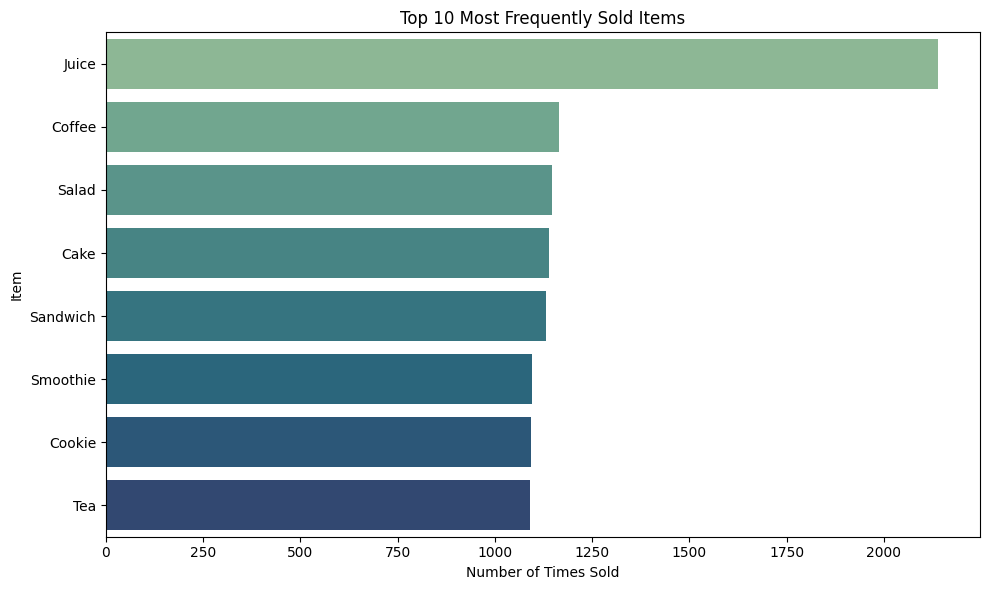

In [24]:
import matplotlib.pyplot as plt

# Count top 10 most sold items
most_sold_items = df['Item'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=most_sold_items.values, y=most_sold_items.index, palette='crest')
plt.title('Top 10 Most Frequently Sold Items')
plt.xlabel('Number of Times Sold')
plt.ylabel('Item')
plt.tight_layout()
plt.show()


#### 1.2. Which items generate the most total revenue?

While some items may be frequently sold, they may not necessarily bring in the most money. Here, I calculated revenue as:



In [21]:
# Create a new column:
df['Item Revenue'] = df['Price Per Unit'] * df['Quantity']

# Group by Item and calculate total revenue
revenue_by_item = df.groupby('Item')['Item Revenue'].sum().sort_values(ascending=False).head(10)


This bar chart highlights the top 10 items that have generated the most total revenue for the café.

This helps identify the café’s highest-earning products — a valuable insight for promotions and inventory planning.


<ipython-input-23-2281653579>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_item.values, y=revenue_by_item.index, palette='mako')


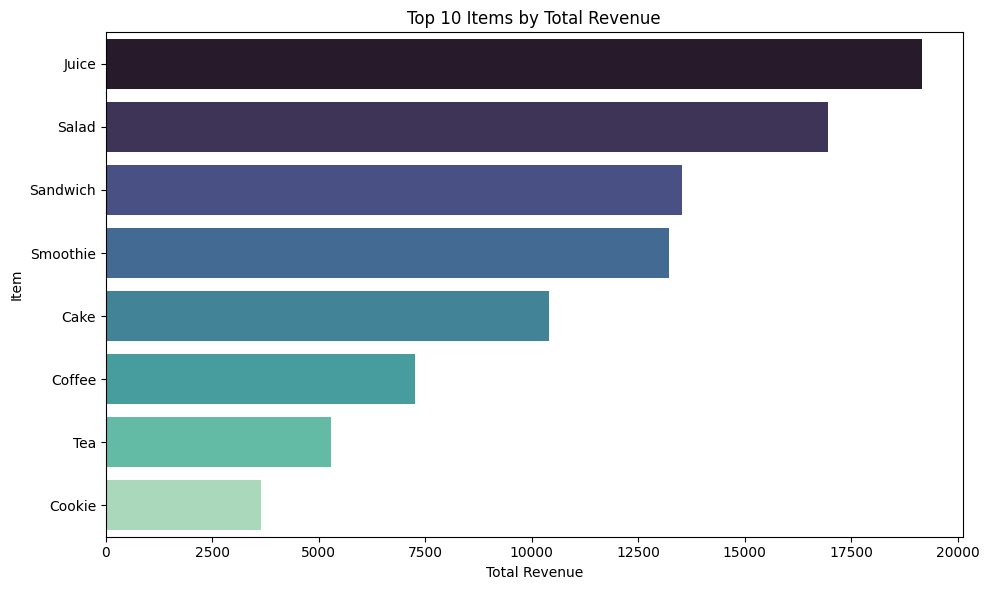

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_item.values, y=revenue_by_item.index, palette='mako')
plt.title('Top 10 Items by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

#### 2.1 Which days of the week have the highest sales activity?

Using the `Transaction Date` column, I created a new column called `Day of Week` during the cleaning phase.

Here, I grouped transactions by day and summed the total sales. This chart helps identify which days bring in the most revenue — useful for scheduling, staffing, and marketing campaigns.

Consistent spikes on certain days could suggest customer routines or promotional opportunities.


<ipython-input-25-2104518401>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='rocket')


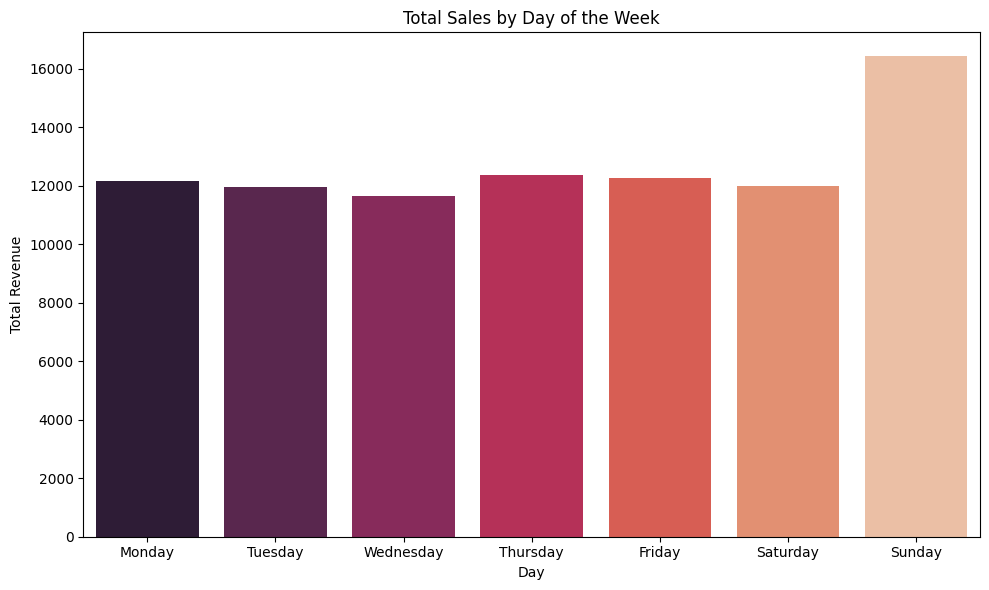

In [25]:
import matplotlib.pyplot as plt

# Group and sum total spent by day of the week
sales_by_day = df.groupby('Day of Week')['Total Spent'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='rocket')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

#### 2.2 How do monthly sales compare?

To understand seasonal trends or monthly performance, I grouped transactions by the `Month` column (extracted earlier from the transaction date).

This chart visualizes total café revenue across the months in the dataset. Patterns here could reveal high-traffic seasons, slow periods, or opportunities for special promotions.


<ipython-input-26-3296259884>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_labels[:len(sales_by_month)], y=sales_by_month.values, palette='flare')


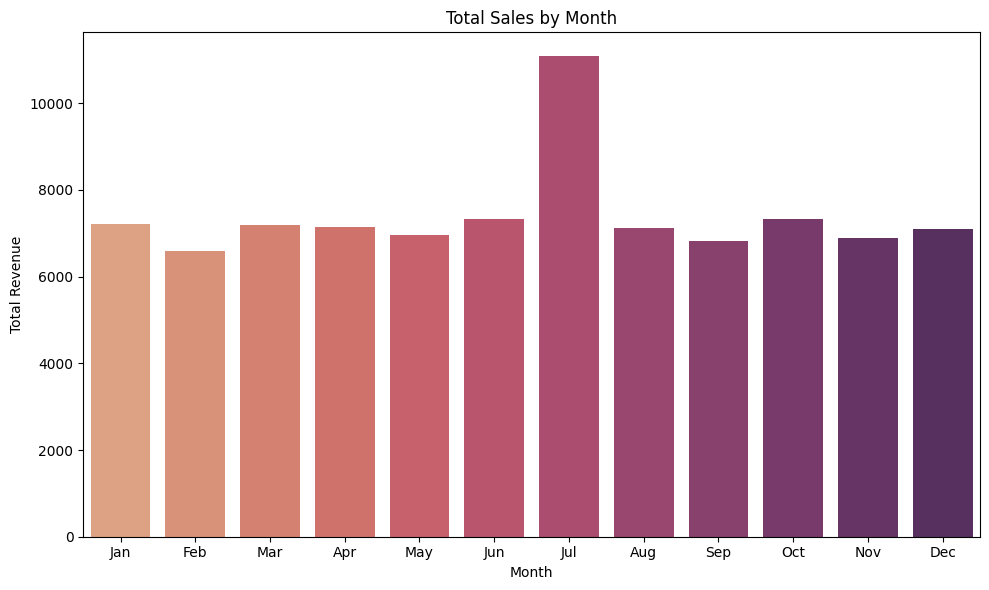

In [26]:
import matplotlib.pyplot as plt

# Group and sum total spent by month
sales_by_month = df.groupby('Month')['Total Spent'].sum().sort_index()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=month_labels[:len(sales_by_month)], y=sales_by_month.values, palette='flare')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

#### 3.1 What are the most commonly used payment methods?

This chart shows how customers typically pay at the café — whether via card, cash, or other methods.

Understanding popular payment types is useful for day-to-day operations (e.g., keeping enough change) and enhancing the customer experience (e.g., enabling digital wallets).


<ipython-input-29-467159795>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.values, y=payment_counts.index, palette='pastel')


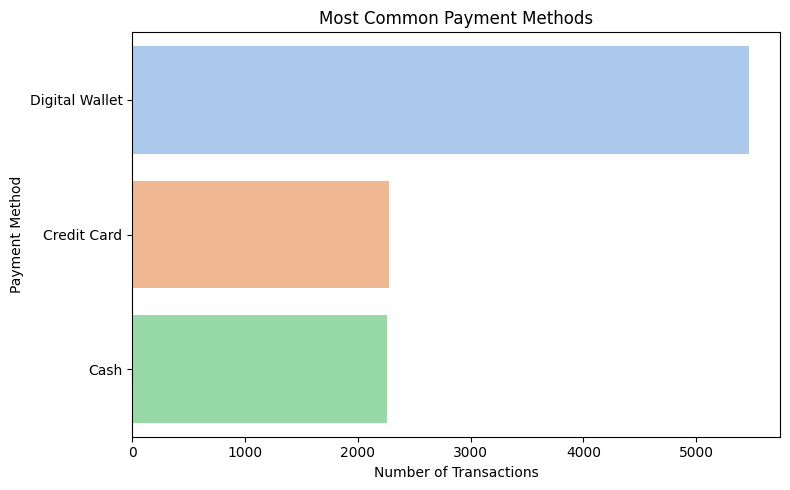

In [29]:
import matplotlib.pyplot as plt


# Count each payment method
payment_counts = df['Payment Method'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.values, y=payment_counts.index, palette='pastel')
plt.title('Most Common Payment Methods')
plt.xlabel('Number of Transactions')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()

#### 3.2 Do customers spend differently depending on payment method?

Here, I compared the **average transaction value** across different payment methods.

This can offer insight into customer behavior — for example, card or mobile payments might be linked to higher spending than cash.

Such patterns could help inform marketing, payment system decisions, and even loyalty program targeting.


<ipython-input-34-2821310303>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spend_by_method.values, y=avg_spend_by_method.index, palette='coolwarm')


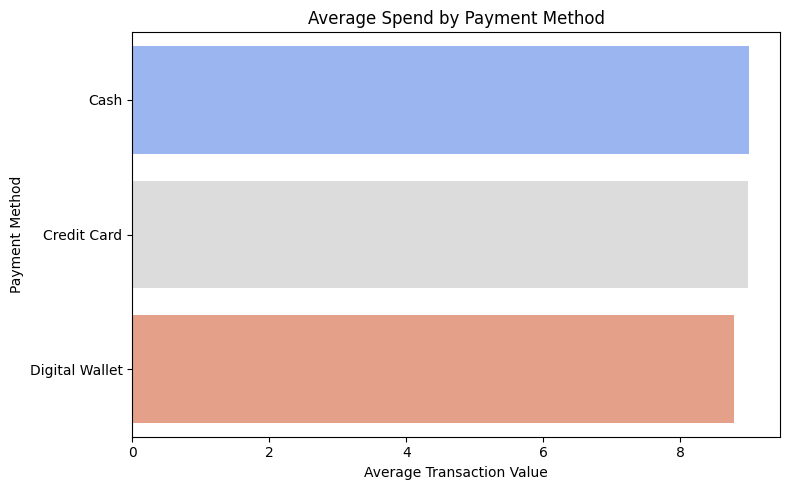

In [34]:
# Calculate average spend by payment method
avg_spend_by_method = df.groupby('Payment Method')['Total Spent'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=avg_spend_by_method.values, y=avg_spend_by_method.index, palette='coolwarm')
plt.title('Average Spend by Payment Method')
plt.xlabel('Average Transaction Value')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()
